<a href="https://colab.research.google.com/github/ivynasantino/vies-discursos-deputados/blob/master/reports/discursos_w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import gensim
import nltk
from nltk.corpus import stopwords

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("./raw_noticias_estadao_2018.csv")
#df = pd.read_csv("https://raw.githubusercontent.com/ivynasantino/vies-discursos-deputados/master/data/all_discursos.csv")
df.head()

,subFonte,titulo,conteudo,url,repercussao,idNoticia,caderno,data,ano,mes,dia
0,ESTADAO,"Marina pede, aliados ironizam","Em queda nas pesquisas de intenção de voto, Ma...",https://br18.com.br/marina-pede-aliados-ironizam/,0,-,politica,2018-09-19,2018,9,19
1,ESTADAO,PF já ouviu 15 testemunhas e analisou 2 teraby...,A Polícia Federal pediu à 3.ª Vara Federal de ...,https://politica.estadao.com.br/blogs/fausto-m...,0,-,politica,2018-09-19,2018,9,19
2,ESTADAO,Países se unem para dar resposta política à gu...,GENEBRA - Quarenta países se unem para dar uma...,https://economia.estadao.com.br/noticias/geral...,0,-,economia,2018-09-19,2018,9,19
3,ESTADAO,146 candidatos barrados,"Até a última terça-feira, 19, 146 candidaturas...",https://br18.com.br/146-candidatos-barrados/,0,-,politica,2018-09-19,2018,9,19
4,ESTADAO,Decano deixa a Lava Jato,Depois de quatro anos integrando a força-taref...,https://politica.estadao.com.br/blogs/fausto-m...,0,-,politica,2018-09-19,2018,9,19


In [53]:
df.shape

(33459, 11)

In [65]:
nltk.download('stopwords')

# removendo stopwords
default_stopwords = set(stopwords.words('portuguese'))
stopwords_complement = ["", "neste","és", "é", "somos", "sois", "são", "era", "eras", "éreis", "foste", "fostes", "foras",	"fôreis",	"serás", "sereis", "serão",	"serias", "seríeis", "sejas", "sejais", "fosses", "fôsseis", "fores", "fordes", "sê", "sejas", "sejais", "ser", "seres", "sermos",	"serdes",	"serem", "sobre", "é"]

stopwords_complement.extend(default_stopwords)

partidos = ["pp","psdb","cidadania", "avante", "dc", "dem", "mdb", "novo", "patri", "patriota", "pcb", "pcdob", "pco", "phs", "pdt", "pl", "pmb", "pt"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
  itens = read_questions(row, "conteudo")
  lista = []
  for i in itens:
    if len(i) > 3:
      lista.append(i)
    if i in partidos:
      lista.append(i)
    elif i not in stopwords_complement:
      lista.append(i)
 
  documents.append(lista)

In [0]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [0]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)

In [75]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(65919652, 67173685)

In [0]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        count += 1
    else:
        break

In [77]:
len(word_vectors.vocab)

97470

In [78]:
vector = model.wv["previdência"] 
len(vector)

150

In [79]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'acordo': <gensim.models.keyedvectors.Vocab at 0x7f2a2e75ceb8>,
 'adélio': <gensim.models.keyedvectors.Vocab at 0x7f2a2e821828>,
 'agressor': <gensim.models.keyedvectors.Vocab at 0x7f2a2e7ce940>,
 'aliados': <gensim.models.keyedvectors.Vocab at 0x7f2a2e81ab38>,
 'além': <gensim.models.keyedvectors.Vocab at 0x7f2a2e3b5588>,
 'analisou': <gensim.models.keyedvectors.Vocab at 0x7f2a2e4ebac8>,
 'angariar': <gensim.models.keyedvectors.Vocab at 0x7f2a2de0c518>,
 'anos': <gensim.models.keyedvectors.Vocab at 0x7f2a2e821b00>,
 'antecipada': <gensim.models.keyedvectors.Vocab at 0x7f2a2e815ba8>,
 'antes': <gensim.models.keyedvectors.Vocab at 0x7f2a2c9d56d8>,
 'apreendido': <gensim.models.keyedvectors.Vocab at 0x7f2a2dde80b8>,
 'apuração': <gensim.models.keyedvectors.Vocab at 0x7f2a2e821a58>,
 'após': <gensim.models.keyedvectors.Vocab at 0x7f2a2e82db00>,
 'ataque': <gensim.models.keyedvectors.Vocab at 0x7f2a2e821e10>,
 'atentado': <gensim.models.keyedvectors.Vocab at 0x7f2a2e821780>,
 'atentando':

In [80]:
X = model[wanted_vocab] 
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


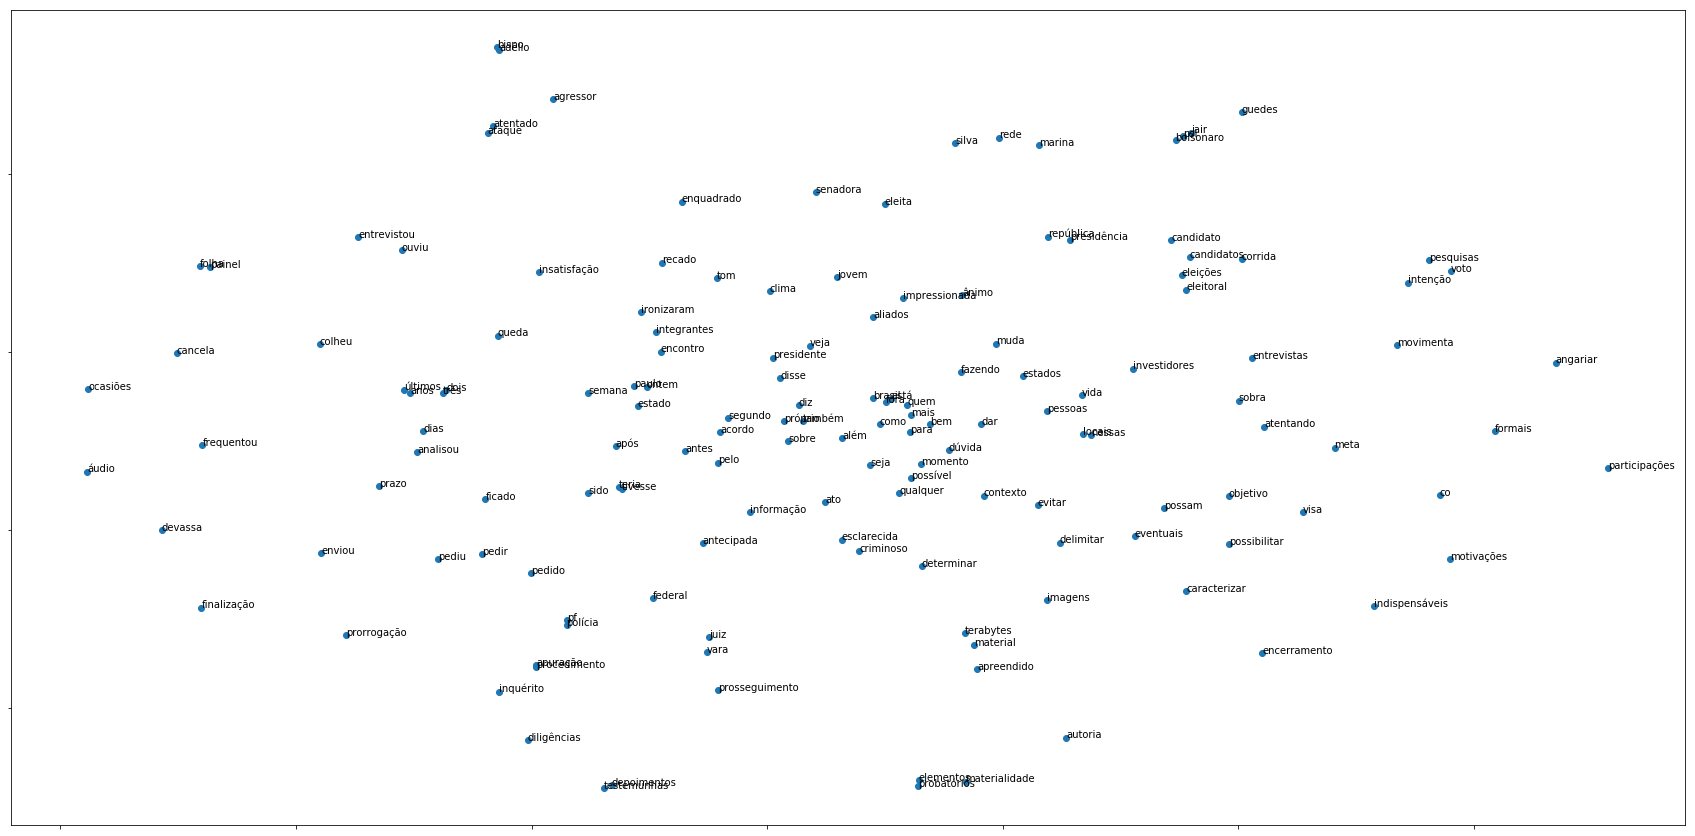

In [82]:
fig, ax = plt.subplots(figsize=(30,15))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([]) 
_ = plt.show()

In [95]:
w1 = ["pt", "eleição"]
#w2 = ["previdência"]
model.wv.most_similar(positive=w1,topn=15)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('drenada', 0.7384082674980164),
 ('reconduzida', 0.7303161025047302),
 ('selem', 0.7173165678977966),
 ('mudancista', 0.7120822668075562),
 ('incumbente', 0.7115312218666077),
 ('rachem', 0.7109391093254089),
 ('registrarão', 0.710361659526825),
 ('afunile', 0.7087026834487915),
 ('enterrarmos', 0.7082955837249756),
 ('tensiona', 0.7063459157943726),
 ('presidencial', 0.703058123588562),
 ('indultaria', 0.7007967233657837),
 ('afrimou', 0.6995126605033875),
 ('ilegibilidade', 0.698167085647583),
 ('sufragarão', 0.6965861320495605)]

In [96]:
w1 = ["psl", "eleição"]
model.wv.most_similar(positive=w1, topn=15)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('palmômetro', 0.7987295389175415),
 ('polariza', 0.7730882167816162),
 ('jair', 0.7725792527198792),
 ('bolsonaro', 0.7675491571426392),
 ('disputariam', 0.7581168413162231),
 ('drenada', 0.7243065237998962),
 ('presidenciável', 0.7169955968856812),
 ('rachem', 0.7155784368515015),
 ('semirreformista', 0.7152149081230164),
 ('bolsonarosp', 0.7151627540588379),
 ('bolsonarodo', 0.7137497067451477),
 ('credenciando', 0.7113445997238159),
 ('peitar', 0.709196925163269),
 ('dedicaria', 0.7088927030563354),
 ('afrimou', 0.706086277961731)]

In [124]:
model.wv.similarity("bolsonaro", "previdência")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.2669807

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
def tsnescatterplot(model, word, list_names):
   
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=16).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


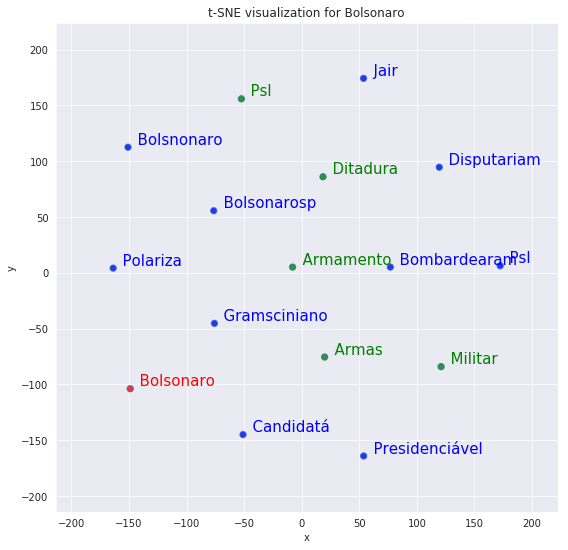

In [160]:
tsnescatterplot(model, 'bolsonaro', ["ditadura", "militar", "armas", "armamento", "psl"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


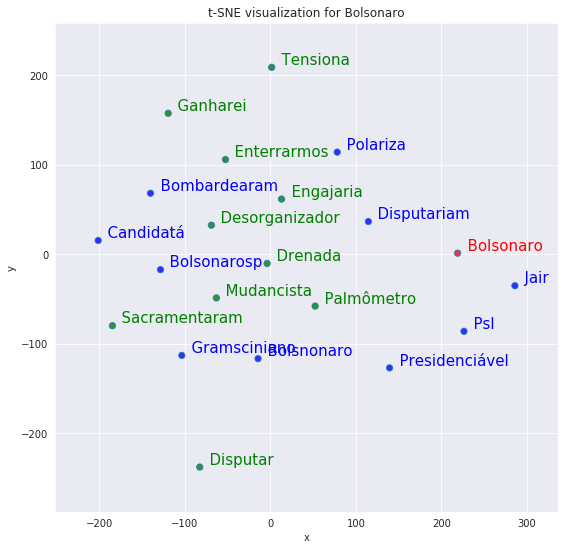

In [146]:
tsnescatterplot(model, 'bolsonaro', [t[0] for t in model.wv.most_similar(positive=["eleição"], topn=20)][10:])